In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE


In [2]:
#Importing data
df = pd.read_excel("C:/Users/Selam/Desktop/smiplilearn/capstone video/project2/Datasets/data.xlsx")


In [3]:
df.head(6)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
5,498082,73123,92900,79.66,67,22807,45,1480,1989-01-02,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
#insight into the data type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

In [5]:
df.shape

(233154, 41)

In [6]:
#checking null values
df.isna().sum(axis = 0)

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [7]:
df.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [8]:
#renaming coloumn to a acceptable names
df = df.rename(columns = {"Date.of.Birth": "date_of_birth","Employment.Type":"employment_type",
                          "PERFORM_CNS.SCORE":"perform_cns_score","PERFORM_CNS.SCORE.DESCRIPTION":"perform_cns_score_description",
                          "PRI.NO.OF.ACCTS":"pri_no_of_accts",
                          "PRI.ACTIVE.ACCTS":"pri_active_accts","PRI.OVERDUE.ACCTS":"pri_overdue_accts",
                          "PRI.CURRENT.BALANCE":"pri_current_balance","PRI.SANCTIONED.AMOUNT":"pri_sanctioned_amount",
                         "PRI.DISBURSED.AMOUNT":"pri_disbursed_amount", "SEC.NO.OF.ACCTS":"sec_no_of_accts",
                          "SEC.ACTIVE.ACCTS":"sec_active_accts","SEC.OVERDUE.ACCTS":"sec_overdue_accts",
                          "SEC.CURRENT.BALANCE":"sec_current_balance", "SEC.SANCTIONED.AMOUNT":"sec_sanctioned_amount",
                         "SEC.DISBURSED.AMOUNT":"sec_disbursed_amount","PRIMARY.INSTAL.AMT":"primary_instal_amt",
                          "SEC.INSTAL.AMT":"sec_instal_amt","NEW.ACCTS.IN.LAST.SIX.MONTHS":"new_accts_in_last_six_months",
                          "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS":"delinquent_accts_in_last_six_months",
                          "AVERAGE.ACCT.AGE":"average_acct_age", "CREDIT.HISTORY.LENGTH":"credit_history_length",
                          "NO.OF_INQUIRIES":"no_of_inquiries" })

In [9]:
print(df.columns)


Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'date_of_birth',
       'employment_type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')


In [10]:
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,date_of_birth,employment_type,...,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,561031,57759,76350,77.28,5,22289,51,3326,1981-11-10,Self employed,...,0,0,0,0,0,0,2yrs 4mon,2yrs 4mon,0,0
233150,649600,55009,71200,78.72,138,17408,51,3385,1992-10-15,Self employed,...,0,0,15209,0,0,0,1yrs 5mon,1yrs 5mon,1,0
233151,603445,58513,68000,88.24,135,23313,45,1797,1981-12-19,Self employed,...,0,0,257948,0,35,5,0yrs 9mon,3yrs 10mon,1,0
233152,442948,22824,40458,61.79,160,16212,48,96,1989-07-31,Self employed,...,0,0,26046,0,9,1,1yrs 2mon,3yrs 2mon,0,0


In [11]:
#Type of employment
df.employment_type.unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [12]:
#replacing na value with mode
df['employment_type'] = df['employment_type'].fillna(df['employment_type'].mode()[0])

In [13]:
#checking for duplicated rows
df[df.duplicated()]
#no duplicate values 

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,date_of_birth,employment_type,...,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default


In [14]:
#Provide the statistical description of the quantitative data variables
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


<AxesSubplot:xlabel='loan_default', ylabel='count'>

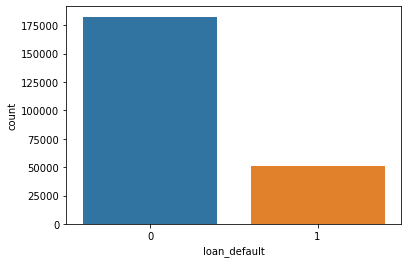

In [15]:
#Explain how is the target variable distributed overall
sns.countplot(x="loan_default",data= df)
#The number of the target variable is not balanced 

Text(0, 0.5, 'Count Branch Id')

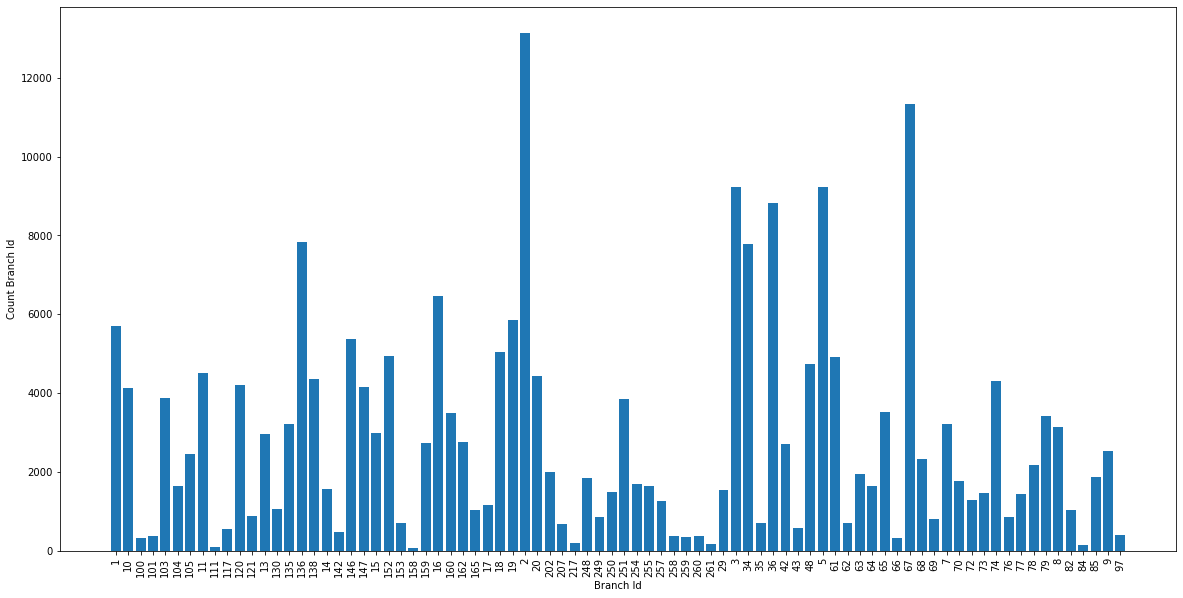

In [16]:
#Study the distribution of the target variable across various categories like branch, city, state,supplier, manufacturer
#Branch using groupby

df["branch_id"] = df["branch_id"].astype(str)
loan_default_branch= df[["loan_default","branch_id"]] 
grouped_loan_branch= loan_default_branch.groupby("branch_id",as_index = False).count()
grouped_loan_branch

plt.figure(figsize= [20,10])
plt.xticks(rotation='vertical')
#grouped_loan_branch_sorted =grouped_loan_branch.sort_values(by="loan_default", ascending=False)
plt.bar(height= grouped_loan_branch["loan_default"], x= grouped_loan_branch["branch_id"])
plt.xlabel("Branch Id")
plt.ylabel("Count Branch Id")


#Some branchs have more customers or gave loans more often than others.The branch distribution is not even. 


<AxesSubplot:xlabel='branch_id', ylabel='Count'>

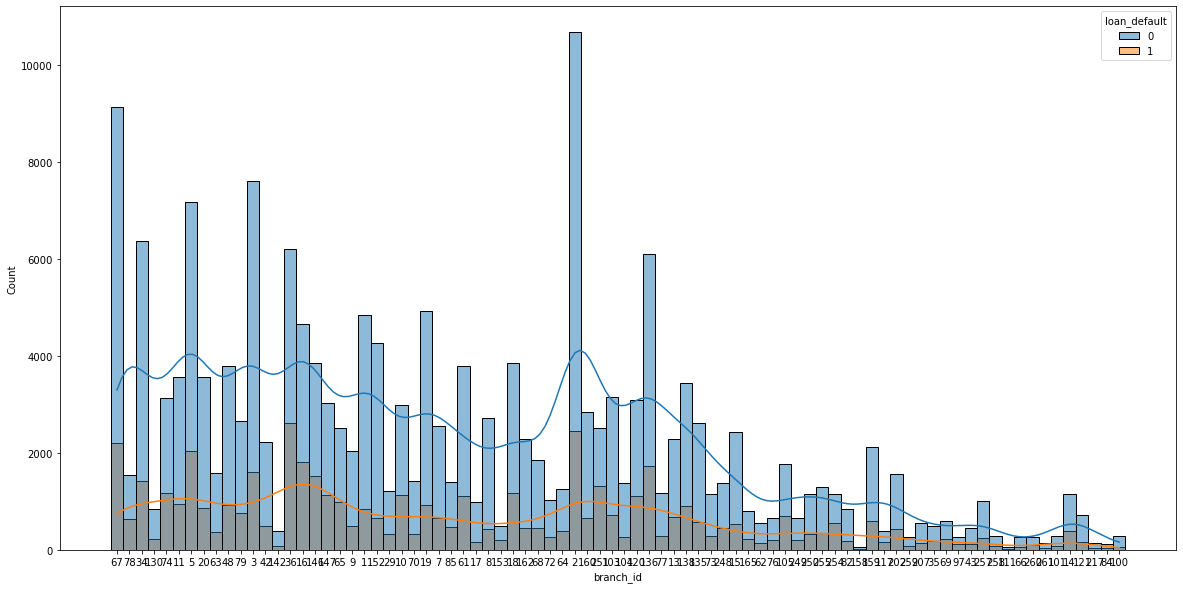

In [17]:
#Study the distribution of the target variable across various categories like branch, city, state,supplier, manufacturer
#Branch

#2nd method seaborn hisplot
plt.figure(figsize= [20,10])
sns.histplot(data=df, x="branch_id", hue= "loan_default", kde=True)
#The branch id distribution is not even. Some branch gave loans more often than others.

Text(0, 0.5, 'Count State ID')

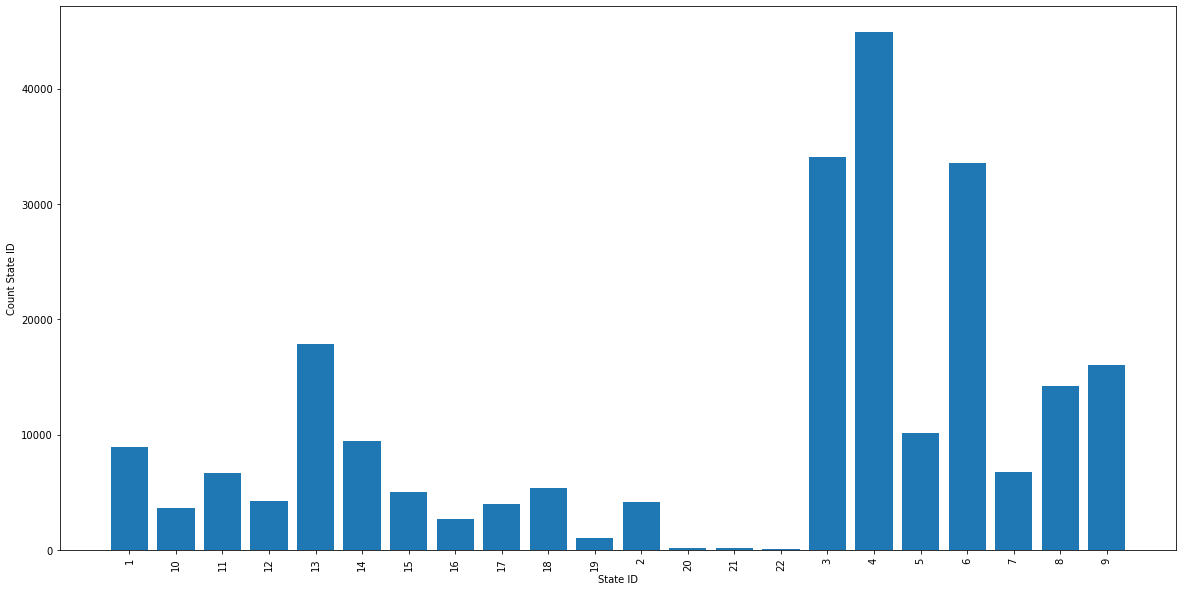

In [19]:
#state

df["State_ID"] = df["State_ID"].astype(str)
loan_default_state= df[["loan_default","State_ID"]] 
grouped_loan_state= loan_default_state.groupby("State_ID",as_index = False).count()
grouped_loan_state

plt.figure(figsize= [20,10])
plt.xticks(rotation='vertical')

#grouped_loan_state_sorted =grouped_loan_state.sort_values(by="loan_default", ascending=False)
plt.bar(height= grouped_loan_state["loan_default"], x= grouped_loan_state["State_ID"])

plt.xlabel("State ID")
plt.ylabel("Count State ID")

#The State distribution is not even

<AxesSubplot:xlabel='State_ID', ylabel='Count'>

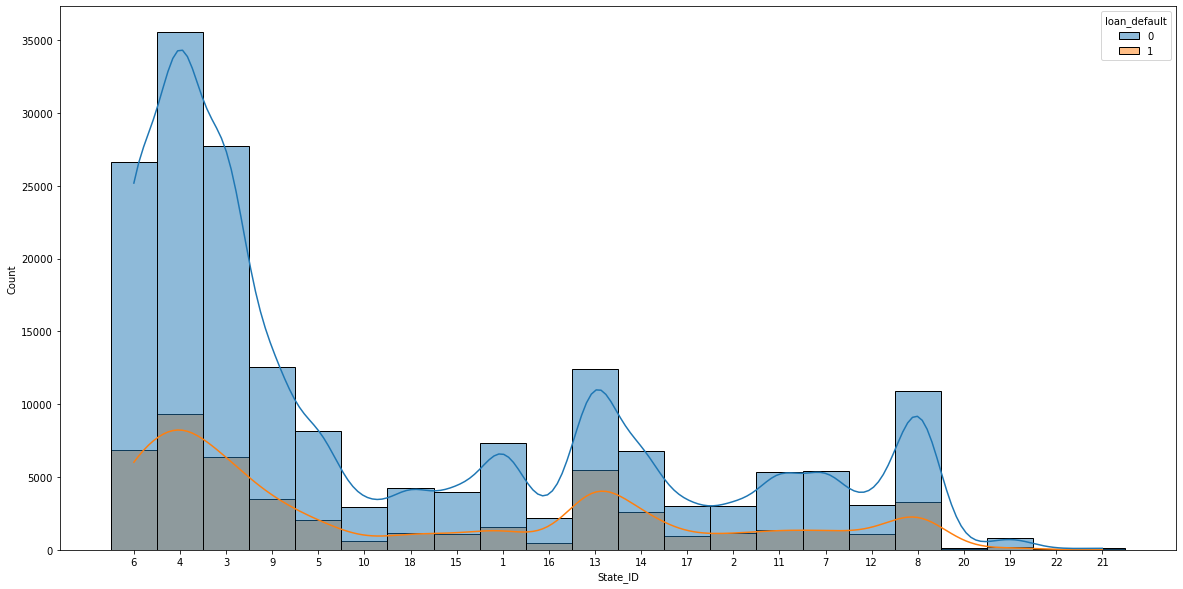

In [20]:
#State
#2nd method seaborn histplot
plt.figure(figsize= [20,10])
#sns.set_palette("dark")
sns.histplot(data=df, x="State_ID", hue= "loan_default", kde=True)
#The state distribution is not even

Text(0, 0.5, 'Count Manufacturer ID')

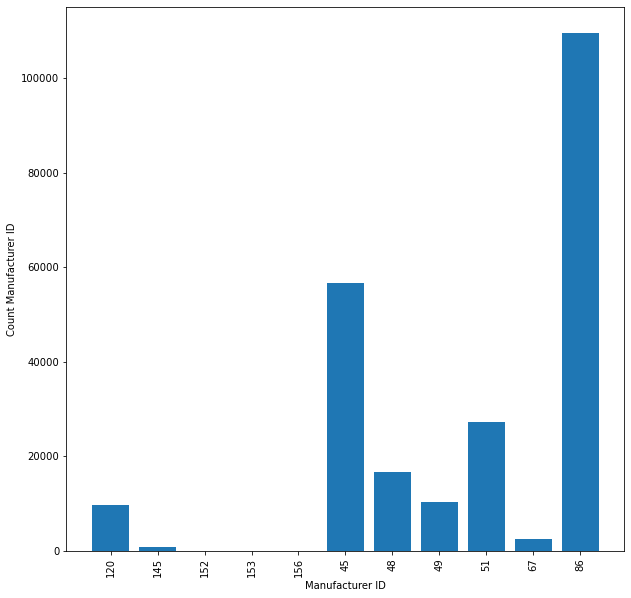

In [21]:
#manufacturer_id
#using groupby
df["manufacturer_id"] = df["manufacturer_id"].astype(str)
loan_default_manufacturer= df[["loan_default","manufacturer_id"]] 
grouped_loan_manufacturer= loan_default_manufacturer.groupby("manufacturer_id",as_index = False).count()
grouped_loan_manufacturer

plt.figure(figsize= [10,10])
plt.xticks(rotation='vertical')
#grouped_loan_manufacturer_sorted= grouped_loan_manufacturer.sort_values(by= "loan_default",ascending = False)
plt.bar(height= grouped_loan_manufacturer["loan_default"], x= grouped_loan_manufacturer["manufacturer_id"])

plt.xlabel("Manufacturer ID")
plt.ylabel("Count Manufacturer ID")

#Manufacture type of the vehicles is not evenly distributed. The number of type of cars in the dataset is not the same. 

<AxesSubplot:xlabel='manufacturer_id', ylabel='Count'>

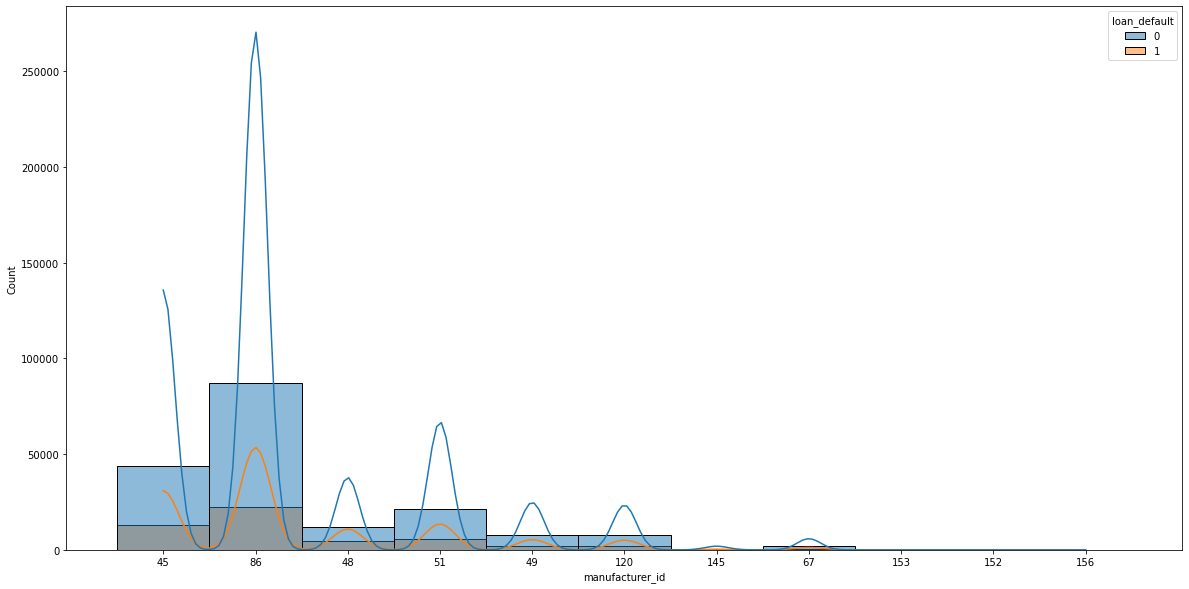

In [22]:
#manufacturer id
#using seaborn histplot
plt.figure(figsize= [20,10])
#sns.set_palette("dark")
sns.histplot(data=df, x="manufacturer_id", hue= "loan_default", kde=True)
#The number of type of cars in the dataset is not the same. 

Text(0, 0.5, 'Count Supplier ID')

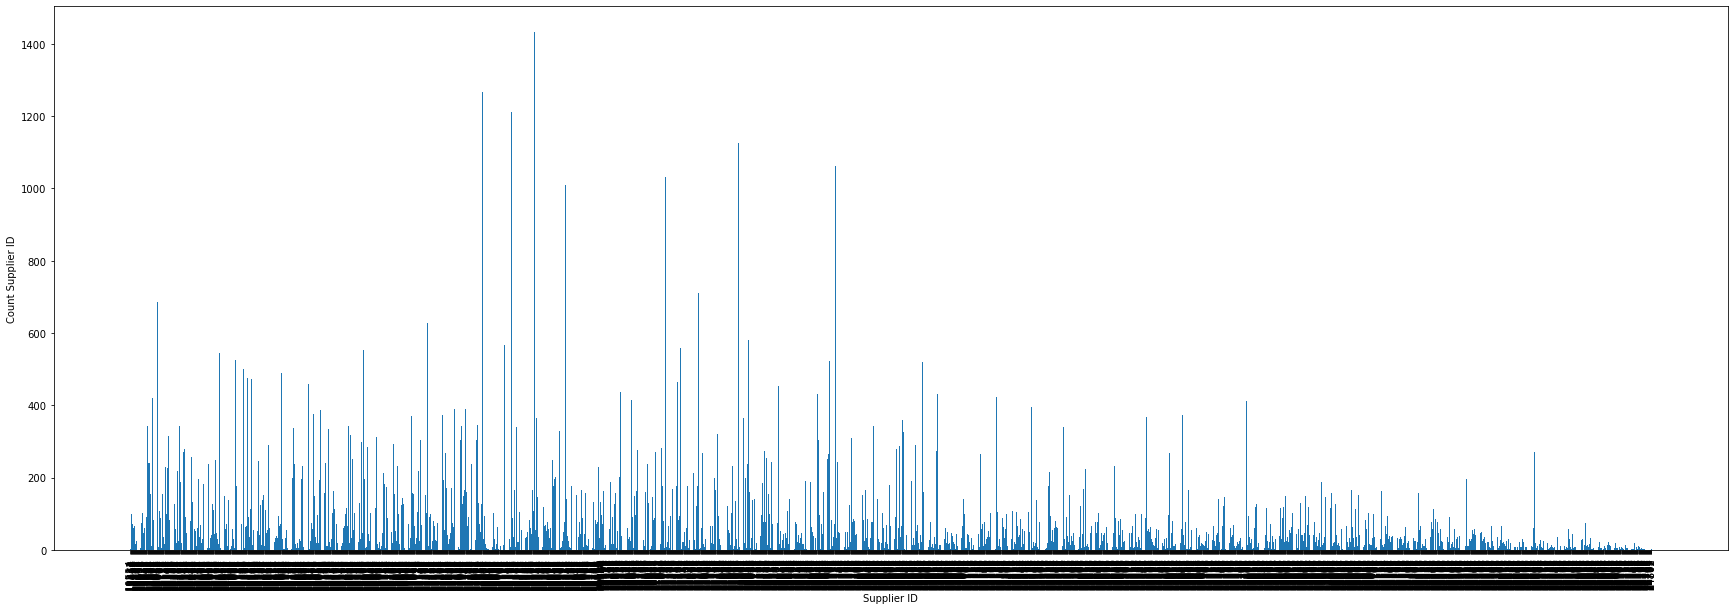

In [23]:
#supplier_id
#using groupby
df["supplier_id"] = df["supplier_id"].astype(str)
loan_default_supplier= df[["loan_default","supplier_id"]] 
grouped_loan_supplier= loan_default_supplier.groupby("supplier_id",as_index = False).count()
grouped_loan_supplier

plt.figure(figsize= [30,10])
plt.xticks(rotation='vertical')
plt.bar(height= grouped_loan_supplier["loan_default"], x= grouped_loan_supplier["supplier_id"])

plt.xlabel("Supplier ID")
plt.ylabel("Count Supplier ID")

#The Distribution of suppliers is not even. 


<AxesSubplot:xlabel='supplier_id', ylabel='Count'>

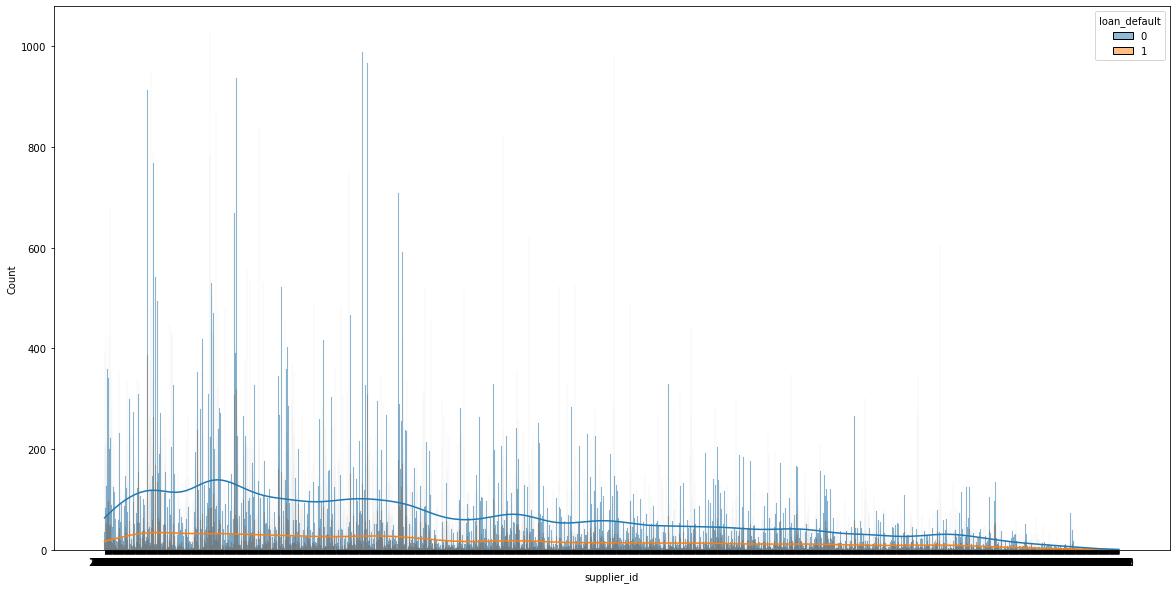

In [24]:
#supplier id using seaborn histplot
plt.figure(figsize= [20,10])
#sns.set_palette("bright")
sns.histplot(data=df, x="supplier_id", hue= "loan_default", kde=True)

#The Distribution of suppliers is not even.

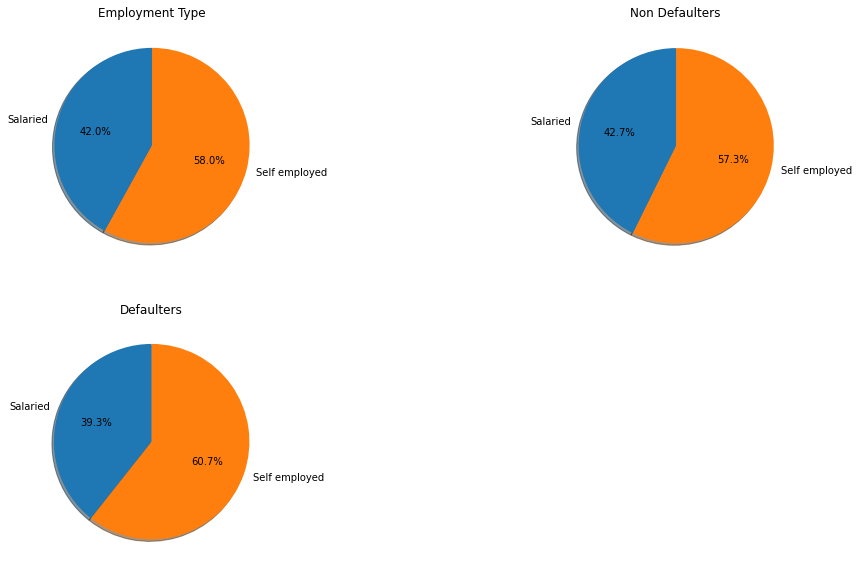

In [25]:
#Use pie charts to express the different types of employment that define the defaulters and non-defaulters.

# defaulter/non defaulter vs employment type

df["loan_default"]=df["loan_default"].astype(int)
df["employment_type"].unique()
loan_employment= df[["employment_type","loan_default"]]

grouped_loan_employment= loan_employment.groupby("employment_type").count()
grouped_loan_employment = (grouped_loan_employment/grouped_loan_employment["loan_default"].sum())*100
grouped_loan_employment

#Defaulter
non_defaulter = loan_employment[loan_employment["loan_default"]== 0]
defaulter = loan_employment[loan_employment["loan_default"]== 1]

defaulter_chart= defaulter.groupby("employment_type",as_index = False).count()
defaulter_chart

#Non Defaulter
non_defaulter_chart= non_defaulter.groupby("employment_type",as_index = False).count()
non_defaulter_chart

my_labels = 'Salaried','Self employed'
fig = plt.figure(figsize=(18,10))

#fig1, ax1 = plt.subplots()
ax1 = plt.subplot2grid((2,4),(0,0))
ax1.pie(grouped_loan_employment["loan_default"], labels=my_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Employment Type')


#pie chart for defaulter and non defaulter

#Non defaulter
ax1 = plt.subplot2grid((2,4),(0,2))
ax1.pie(non_defaulter_chart["loan_default"], labels=my_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Non Defaulters')

#Defaulter pie chart
ax1 = plt.subplot2grid((2,4),(1,0))
ax1.pie(defaulter_chart["loan_default"], labels=my_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Defaulters')
plt.show()

#There are more self employed in the dataset than salaried.
#There are more self employed in the defaulters than in the non defaulters.
#The fact that more defaulter are self employed maybe employment type can be one of factors to determine loan defaulters.  






Text(0, 0.5, 'Count of defaulter ')

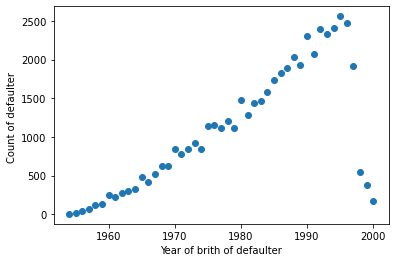

In [26]:
#Has age got anything to do with defaulting? What is the distribution of age w.r.t. to the defaulters and non-defaulters?
# Age vs defaulter using scatter plot
#Defaulter
df["loan_default"]=df["loan_default"].astype(int)
df['year'] = df['date_of_birth'].dt.year

loan_age = df[["loan_default", "year"]]
loan_age
defaulter_age = loan_age[loan_age["loan_default"]== 1]
defaulter= defaulter_age.groupby("year",as_index= False).count()
defaulter
plt.scatter(x= defaulter['year'], y= defaulter['loan_default'])

plt.xlabel("Year of brith of defaulter")
plt.ylabel("Count of defaulter ")

##It seems like that there is not much difference in the distribution of age of defaulter and non defaulter.

#Defaulters
#when we see the distribution of age overall the counts of customers increases starting from age year of 1950 to 1995.
#From 1995 to 2000 it went down.
#As the customers got younger the number of customers increased until 1995.This could mean that age is one of the factors that help to predict loan default.





Text(0, 0.5, 'Count of non defaulter ')

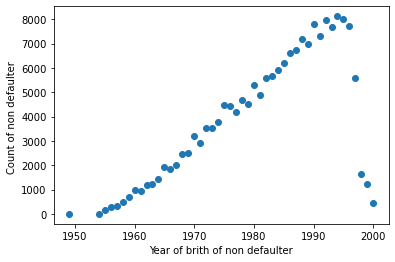

In [27]:
#Age vs non defaulter using scatter plot
#Non defaulter distribution 
loan_age = df[["loan_default", "year"]]
loan_age
non_defaulter_age = loan_age[loan_age["loan_default"]== 0]
non_defaulter = non_defaulter_age.groupby("year",as_index= False).count()
non_defaulter
plt.scatter(x= non_defaulter['year'], y= non_defaulter['loan_default'])
plt.xlabel("Year of brith of non defaulter")
plt.ylabel("Count of non defaulter ")

#Non defaulter
#The non defaulter distribution is the same as the defaulter distibution. 
#The distribution of age the count of customers increases starting from age year of 1950 to 1995 and went down from 1995 to 2000.
#As the customers got younger the number of customers increased until 1995.This could mean that age is one of the factors that helps to predict loan default.



<AxesSubplot:xlabel='date_of_birth', ylabel='Count'>

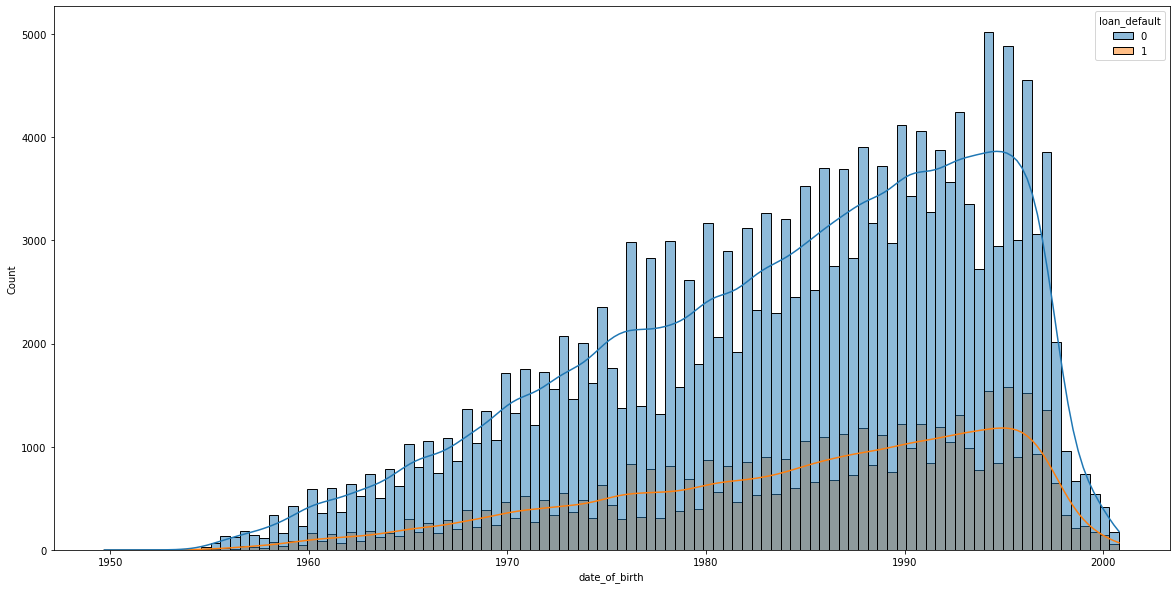

In [28]:
#Has age got anything to do with defaulting? What is the distribution of age w.r.t. to the defaulters and non-defaulters?
plt.figure(figsize= [20,10])
#sns.set_palette("bright")
sns.histplot(data=df, x="date_of_birth", hue= "loan_default", kde=True)

##The overall distribution of age count increases starting from age year of 1950 to 1995.
#From 1995 to 2000 it went down. Those who were  born in between 1990 and 1995 have the highest number 
#As the customers got younger the number of customers increased until 1995.This could mean that age is one of the factors that help to predict loan default.

In [29]:
#Correlation between loan_default and date of birth
df["date_of_birth"]=df["date_of_birth"].astype('category').cat.codes
df[["loan_default", "date_of_birth"]].corr()
#no correlation

,loan_default,date_of_birth
loan_default,1.000000,0.036026
date_of_birth,0.036026,1.000000


In [30]:
#What type of ID was presented by most of the customers for proof?
Aadhar= df[["Aadhar_flag","UniqueID"]]
Aadhar_grouped= Aadhar.groupby("Aadhar_flag").count()
Aadhar_grouped

##Aadhar is the highest number of ids the customer provided. 

,UniqueID
Aadhar_flag,
0,37230
1,195924


In [31]:
pan= df[["PAN_flag","UniqueID"]]
pan_grouped= pan.groupby("PAN_flag").count()
pan_grouped

,UniqueID
PAN_flag,
0,215533
1,17621


In [32]:
driving= df[["Driving_flag","UniqueID"]]
driving_grouped= driving.groupby("Driving_flag").count()
driving_grouped

,UniqueID
Driving_flag,
0,227735
1,5419


In [33]:
passport= df[["Passport_flag","UniqueID"]]
passport_grouped= passport.groupby("Passport_flag").count()
passport_grouped
#not going to include in the model because only 0.2% of the customers provided this type of identification. 

,UniqueID
Passport_flag,
0,232658
1,496


,perform_cns_score,loan_default
perform_cns_score,1.000000,-0.057929
loan_default,-0.057929,1.000000


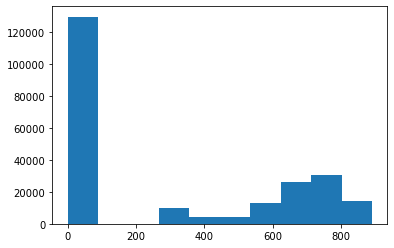

In [34]:
#Study the credit bureau score distribution. Compare the distribution for defaulters vs. non-defaulters. Explore in detail.

plt.hist(df["perform_cns_score"])

per_loan = df[["perform_cns_score","loan_default"]]
per_loan.corr()

#There is no significant correlation between credit bureau score and loan defaulters.
#However,from what we observe in the following graphs and calculations, It seems 53.5% of the defaulters have zero bureau score but 49% of the non defaulter have zero bureau score.The 
#difference is small but it might be something to look at closely. 

In [35]:
##Non defaulter bureau score percentage 
loan_bureau = df[["loan_default", "perform_cns_score"]]
loan_bureau
non_defaulter_bureau = loan_bureau[loan_bureau["loan_default"]== 0]
non_defaulter_bureau_grouped = non_defaulter_bureau.groupby("perform_cns_score",as_index= False).count()
non_defaulter_bureau_grouped 
non_defaulter_bureau_grouped["score percentage"]= ((non_defaulter_bureau_grouped["loan_default"])/(non_defaulter_bureau_grouped["loan_default"]).sum()) *100
non_defaulter_bureau_grouped.sort_values(by= "score percentage", ascending= False)



,perform_cns_score,loan_default,score percentage
0,0,89898,49.247575
445,738,6803,3.726793
7,300,6103,3.343322
532,825,5957,3.263341
5,17,2902,1.589762
...,...,...,...
553,847,1,0.000548
29,322,1,0.000548
541,834,1,0.000548
544,837,1,0.000548


(array([ 7.,  0.,  0., 56., 89., 89., 89., 89., 89., 64.]),
 array([  0.,  89., 178., 267., 356., 445., 534., 623., 712., 801., 890.]),
 <BarContainer object of 10 artists>)

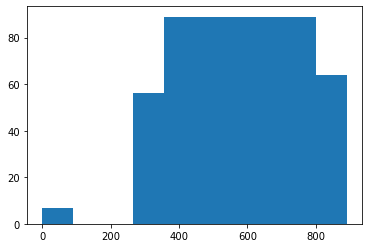

In [36]:
#distribution of non defaulter bureau score
plt.hist(non_defaulter_bureau_grouped ["perform_cns_score"])

In [37]:
#Defaulter bureau score percentage 
defaulter_bureau = loan_bureau[loan_bureau["loan_default"]== 1]
defaulter_bureau_grouped = defaulter_bureau.groupby("perform_cns_score",as_index= False).count()
defaulter_bureau_grouped 

defaulter_bureau_grouped["score percentage"]= ((defaulter_bureau_grouped["loan_default"])/(defaulter_bureau_grouped["loan_default"]).sum()) *100
defaulter_bureau_grouped.sort_values(by= "score percentage", ascending= False)



,perform_cns_score,loan_default,score percentage
0,0,27052,53.450831
6,300,2673,5.281461
439,738,1859,3.673115
515,825,1436,2.837328
2,15,963,1.902748
...,...,...,...
477,776,1,0.001976
500,803,1,0.001976
16,311,1,0.001976
502,806,1,0.001976


(array([ 6.,  0.,  0., 48., 87., 88., 88., 88., 86., 46.]),
 array([  0. ,  87.9, 175.8, 263.7, 351.6, 439.5, 527.4, 615.3, 703.2,
        791.1, 879. ]),
 <BarContainer object of 10 artists>)

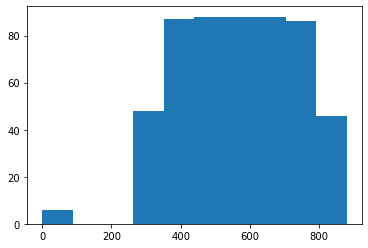

In [38]:
#Distribution of defaulter bureau score
plt.hist(defaulter_bureau_grouped ["perform_cns_score"])


(array([131074.,  25246.,  17179.,  12473.,  12412.,  12025.,   9910.,
          5206.,   6650.,    979.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

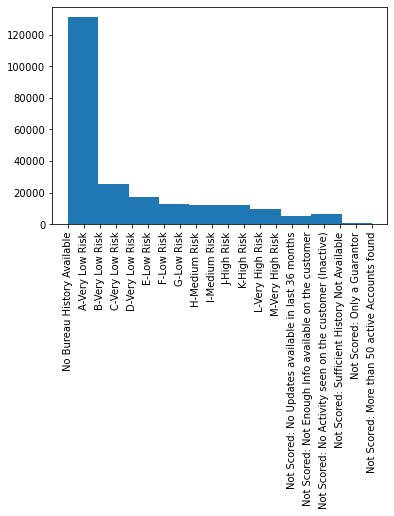

In [39]:
#Just another way of looking at bureau score  
#bureau score description distribution 
plt.xticks(rotation='vertical')
plt.hist(df["perform_cns_score_description"])
#There are more than 120000 customers who bureau score history is not available.

Text(0.5, 1.0, 'Non Defaulter')

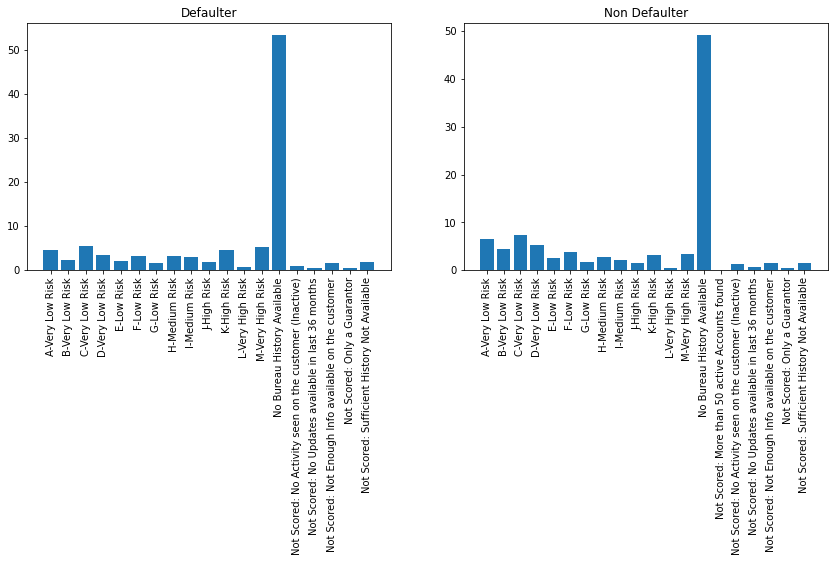

In [40]:
#bureau description of Defaulter and non defaulter
loan_score_dis= df[["loan_default","perform_cns_score_description"]]
defaulter= loan_score_dis[loan_score_dis["loan_default"] == 1]
non_defaulter= loan_score_dis[loan_score_dis["loan_default"] == 0]

fig = plt.figure(figsize=(30,10))


de_grouped = defaulter.groupby("perform_cns_score_description", as_index= False).count()
de_grouped["percentage"] = (de_grouped["loan_default"]/de_grouped["loan_default"].sum())*100

plt.xticks(rotation= 'vertical')
ax1 = plt.subplot2grid((2,4),(0,1))
ax1.bar(height= de_grouped["percentage"],x = de_grouped["perform_cns_score_description"])
plt.title('Defaulter')

non_de_grouped = non_defaulter.groupby("perform_cns_score_description", as_index= False).count()
non_de_grouped["percentage"] = (non_de_grouped["loan_default"]/non_de_grouped["loan_default"].sum())*100
plt.xticks(rotation= 'vertical')
ax1 = plt.subplot2grid((2,4),(0,2))
plt.xticks(rotation= 'vertical')
ax1.bar(height= non_de_grouped["percentage"],x = non_de_grouped["perform_cns_score_description"])
plt.title('Non Defaulter')

#The bar graph shows that the low risk percentage count is little higher in non defaulters than in defaulters. 
#The medium and high risk is little higher in the defaulter than the non defaulters when we see the percentage of the counts below.
#and it might be something to look closely.

In [41]:
#Explore the primary and secondary account details. Is the information in some way related to the loan default probability?

pri_sec = df[['loan_default','pri_active_accts','sec_active_accts']]

pri_sec = df[['loan_default','pri_active_accts','sec_active_accts']]
pri_sec.corr()

#It seems like primary and secondary accounts does not correlate with loan default.


,loan_default,pri_active_accts,sec_active_accts
loan_default,1.000000,-0.041451,-0.005993
pri_active_accts,-0.041451,1.000000,0.055556
sec_active_accts,-0.005993,0.055556,1.000000


<BarContainer object of 2 artists>

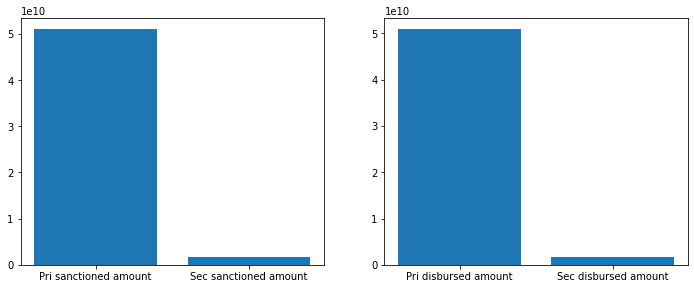

In [42]:
#Is there a difference between the sanctioned and disbursed amount of primary and secondary loans? Study the difference by providing appropriate statistics and graphs.
fig = plt.figure(figsize=(25,10))
ax1 = plt.subplot2grid((2,4),(0,1))
pri_s= df["pri_sanctioned_amount"].sum()
sec_s= df["sec_sanctioned_amount"].sum()
height_san= [pri_s,sec_s]
label= ["Pri sanctioned amount","Sec sanctioned amount"]
ax1.bar(height= height_san, x= label)

ax1 = plt.subplot2grid((2,4),(0,2))
pri_d= df["pri_disbursed_amount"].sum()
sec_d= df["sec_disbursed_amount"].sum()
height_dis= [pri_d,sec_d]
label= ["Pri disbursed amount","Sec disbursed amount"]
ax1.bar(height= height_dis, x= label)

#The pri sanctioned amount is higher than sec sanctioned amount.Also, the pri disbursed amount is
# higher than the sec disbursed amount. 
#The status of pri sanctioned and disbursed amounts maybe affected the amounts of sec sanctioned and disbursed amount.If the loaned
#amount of primary account is defaulted it can affect wheather the customer get loan in the secondary account or not. 



In [43]:
#Do customer who make higher number of enquiries end up being higher risk candidates?
inq_loan= df[["no_of_inquiries","loan_default"]]
inq_loan.corr()
#plt.hist(df['no_of_inquiries'])

# There is no correlation betweeen number of inquiries and loan default


,no_of_inquiries,loan_default
no_of_inquiries,1.000000,0.043678
loan_default,0.043678,1.000000


Text(0.5, 1.0, 'Non Defaulter')

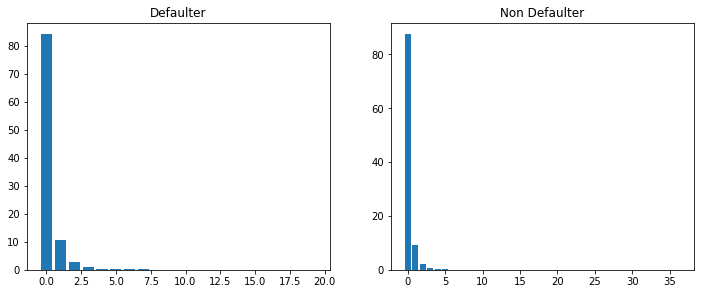

In [44]:
#comparing the percentage of counts of defaulters and non defaulters in of number of inquires 
loan_inq= df[["loan_default","no_of_inquiries"]]
defaulter= loan_inq[loan_inq["loan_default"] == 1]
non_defaulter= loan_inq[loan_inq["loan_default"] == 0]

fig = plt.figure(figsize=(25,10))


de_grouped = defaulter.groupby("no_of_inquiries", as_index= False).count()
de_grouped["percentage"] = (de_grouped["loan_default"]/de_grouped["loan_default"].sum())*100

ax1 = plt.subplot2grid((2,4),(0,1))
ax1.bar(height= de_grouped["percentage"],x = de_grouped["no_of_inquiries"])
plt.title('Defaulter')

non_de_grouped = non_defaulter.groupby("no_of_inquiries", as_index= False).count()
non_de_grouped["percentage"] = (non_de_grouped["loan_default"]/non_de_grouped["loan_default"].sum())*100

ax1 = plt.subplot2grid((2,4),(0,2))
ax1.bar(height= non_de_grouped["percentage"],x = non_de_grouped["no_of_inquiries"])
plt.title('Non Defaulter')

#87% of non defaulter did not make inquiries while 84% of defaulter did not make inquiries.
#Even though the difference is small but it can be worth of exploration. 

In [45]:
# non defaulters count percentage of number of inquiries
non_de_grouped

,no_of_inquiries,loan_default,percentage
0,0,159404,87.324083
1,1,16844,9.227415
2,2,3918,2.146344
3,3,1250,0.684770
4,4,526,0.288151
5,5,212,0.116137
6,6,148,0.081077
7,7,80,0.043825
8,8,61,0.033417
9,9,30,0.016434


In [46]:
#Defaulters count percentage of number of inquiries
de_grouped


,no_of_inquiries,loan_default,percentage
0,0,42557,84.086463
1,1,5441,10.750627
2,2,1491,2.946000
3,3,517,1.021517
4,4,234,0.462350
5,5,131,0.258837
6,6,91,0.179803
7,7,55,0.108672
8,8,44,0.086938
9,9,14,0.027662


In [47]:
#Is credit history, that is new loans in last six months, loans defaulted in last six months, time since first loan. A significant factor in estimating probability of loan defaulters?

df['credit_history_length']=df['credit_history_length'].astype('category').cat.codes
credit_history = df[["new_accts_in_last_six_months","delinquent_accts_in_last_six_months","loan_default","credit_history_length"]]
credit_history.corr()

# There is low correlation between credit history length and new accts in last six months
#There is low correlation between credit history length and delinquent accts in last six months
#There low correlation between delinquent accts in last six months and new accts in last six months.
# There are no correlations between new accts in last six months,delinquent_accts_in_last_six_months,loan_default, credit_history_length with loan default. 


,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,loan_default,credit_history_length
new_accts_in_last_six_months,1.000000,0.182769,-0.029400,0.258186
delinquent_accts_in_last_six_months,0.182769,1.000000,0.034462,0.261384
loan_default,-0.029400,0.034462,1.000000,-0.030175
credit_history_length,0.258186,0.261384,-0.030175,1.000000


In [48]:
balance_loan= df[["pri_current_balance","sec_current_balance","primary_instal_amt","sec_instal_amt","loan_default"]]
balance_loan.corr()
#plt.hist(df["pri_current_balance"])
#These variables are not correlated with loan default or with each other, except there is low correlation between
#pri Current balance and primary instalment amount. 

,pri_current_balance,sec_current_balance,primary_instal_amt,sec_instal_amt,loan_default
pri_current_balance,1.000000,0.019378,0.152499,0.006799,-0.027386
sec_current_balance,0.019378,1.000000,0.010393,0.096351,-0.005531
primary_instal_amt,0.152499,0.010393,1.000000,0.010849,-0.010616
sec_instal_amt,0.006799,0.096351,0.010849,1.000000,-0.001548
loan_default,-0.027386,-0.005531,-0.010616,-0.001548,1.000000


In [49]:
dis_loan= df[["disbursed_amount","loan_default"]]
dis_loan.corr()
# no correlation

,disbursed_amount,loan_default
disbursed_amount,1.000000,0.077675
loan_default,0.077675,1.000000


(array([17744., 17758., 17775., 17789., 17805., 17819., 17836.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

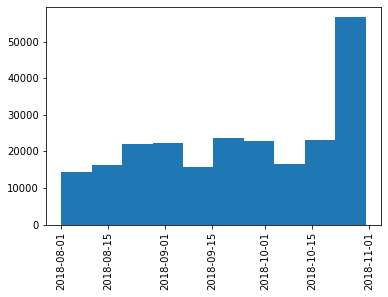

In [50]:
plt.hist(df["DisbursalDate"])
plt.xticks(rotation='vertical')

#It seems like more loans was taken near the end of the year,between October and November. 

(array([1.63379e+05, 3.22920e+04, 1.70200e+04, 1.22680e+04, 5.22600e+03,
        1.00900e+03, 9.17000e+02, 8.97000e+02, 1.11000e+02, 3.50000e+01]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <BarContainer object of 10 artists>)

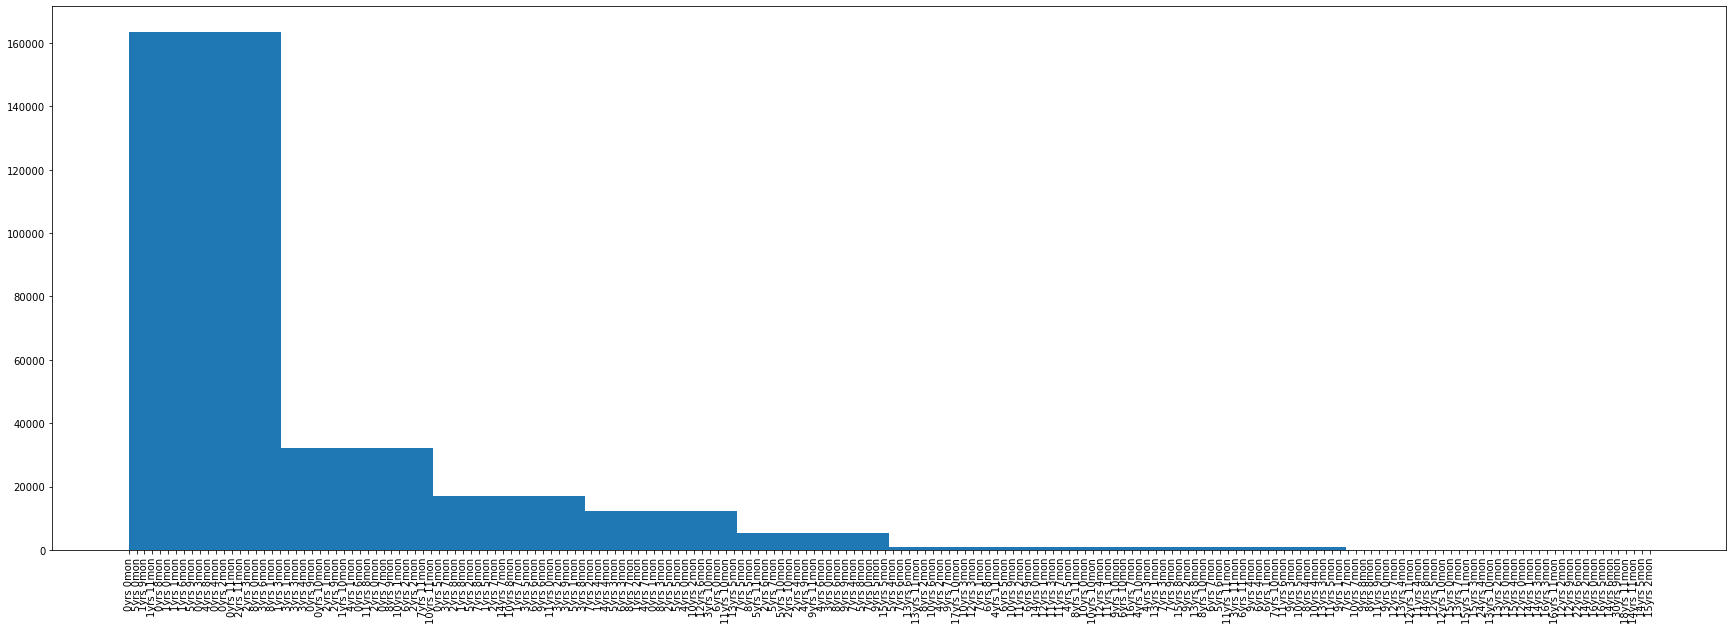

In [51]:
plt.figure(figsize= [30,10])
plt.xticks(rotation= "vertical")
plt.hist(df["average_acct_age"])

#The average account age of the customers is not even.   

In [52]:
#Dropping Employee_code_ID, iniqueID and current pincode because we don't need to use it in the model. 
#We are dropping bureau score because we are using bureau score description instead because the score are not the exact score they are representation of what is in score description.

df2= df.drop(["UniqueID","Current_pincode_ID","perform_cns_score","Employee_code_ID"],axis=1).copy()
df2

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,date_of_birth,employment_type,DisbursalDate,State_ID,...,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,year
0,50578,58400,89.55,67,22807,45,9380,Salaried,2018-08-03,6,...,0,0,0,0,0,0yrs 0mon,0,0,0,1984
1,53278,61360,89.63,67,22807,45,9981,Self employed,2018-08-01,6,...,0,0,0,0,0,0yrs 0mon,0,0,0,1985
2,52378,60300,88.39,67,22807,45,7166,Self employed,2018-09-26,6,...,0,0,0,0,0,0yrs 0mon,0,1,1,1977
3,46349,61500,76.42,67,22807,45,10993,Salaried,2018-09-23,6,...,0,0,0,0,0,0yrs 0mon,0,0,0,1988
4,43594,78256,57.50,67,22744,86,13227,Self employed,2018-10-08,6,...,0,0,0,0,0,0yrs 0mon,0,0,0,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,57759,76350,77.28,5,22289,51,8598,Self employed,2018-10-06,9,...,0,0,0,0,0,2yrs 4mon,198,0,0,1981
233150,55009,71200,78.72,138,17408,51,12590,Self employed,2018-10-31,9,...,0,15209,0,0,0,1yrs 5mon,135,1,0,1992
233151,58513,68000,88.24,135,23313,45,8637,Self employed,2018-10-23,4,...,0,257948,0,35,5,0yrs 9mon,211,1,0,1981
233152,22824,40458,61.79,160,16212,48,11418,Self employed,2018-08-17,16,...,0,26046,0,9,1,1yrs 2mon,214,0,0,1989


In [53]:
#changing text values to numeric
labelencoder= LabelEncoder()
df3= df2.apply(LabelEncoder().fit_transform)


In [54]:
y= pd.DataFrame(data=df3["loan_default"])
df3.pop("loan_default")
x= df3

In [55]:
#Balacing target variable 

from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = X_train.columns
smo_data_X,smo_data_y=smo.fit_resample(X_train, y_train)
smo_data_X = pd.DataFrame(data=smo_data_X,columns=columns)
smo_data_y= pd.DataFrame(data=smo_data_y)


In [56]:
print("length of oversampled data is ",len(smo_data_X))
print("Number of non defaulters in oversampled data",len(smo_data_y[smo_data_y['loan_default']==0]))
print("Number of defaulters",len(smo_data_y[smo_data_y['loan_default']==1]))


length of oversampled data is  255556
Number of non defaulters in oversampled data 127778
Number of defaulters 127778


In [57]:
#Recursive Feature Elimination
#using RFE we are choosing the variables we want to use for our model. 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=50)

rfe = RFE(logreg)
rfe = rfe.fit(smo_data_X, smo_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)



C:\Users\Selam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Selam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[ True  True  True  True  True  True  True False  True  True False False
 False False False False  True False False False  True  True  True False
 False False  True  True  True False  True False False False  True False
 False]
[ 1  1  1  1  1  1  1  8  1  1 20  5 11 10 14 18  1  3  6 19  1  1  1 12
 15 17  1  1  1  2  1  7 16  9  1 13  4]


C:\Users\Selam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
#RFE helped us to select the following features. 
cols= ['disbursed_amount','asset_cost', 'ltv', 'branch_id','supplier_id','manufacturer_id','date_of_birth',
       'DisbursalDate','perform_cns_score_description', 'pri_no_of_accts','pri_current_balance','pri_sanctioned_amount',
       'pri_disbursed_amount','sec_current_balance', 'sec_sanctioned_amount','sec_disbursed_amount','sec_instal_amt',
       'credit_history_length']    
       


x=smo_data_X[cols]
y=smo_data_y


In [59]:
#Finding the p values of the variables
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.671713
         Iterations 5
                                Results: Logit
Model:                  Logit                Pseudo R-squared:     0.031      
Dependent Variable:     loan_default         AIC:                  343356.6936
Date:                   2021-12-02 12:27     BIC:                  343544.8151
No. Observations:       255556               Log-Likelihood:       -1.7166e+05
Df Model:               17                   LL-Null:              -1.7714e+05
Df Residuals:           255538               LLR p-value:          0.0000     
Converged:              1.0000               Scale:                1.0000     
No. Iterations:         5.0000                                                
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [60]:
# we remove Second instalment amount and run the model again because these variables have p value of greater than 0.05
col= ['disbursed_amount','asset_cost','ltv','branch_id','supplier_id','manufacturer_id','date_of_birth','pri_no_of_accts',
 'pri_current_balance','pri_sanctioned_amount','pri_disbursed_amount','sec_current_balance','sec_sanctioned_amount',
'sec_disbursed_amount','primary_instal_amt','average_acct_age','credit_history_length']

x=smo_data_X[col]
y=smo_data_y

logit_model1=sm.Logit(y,x)
result1=logit_model1.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.672875
         Iterations 5
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.029      
Dependent Variable:   loan_default      AIC:               343948.5941
Date:                 2021-12-02 12:27  BIC:               344126.2645
No. Observations:     255556            Log-Likelihood:    -1.7196e+05
Df Model:             16                LL-Null:           -1.7714e+05
Df Residuals:         255539            LLR p-value:       0.0000     
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       5.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
disbursed_amount       0.0001   0.0000  47.8452 0.0000  0.0001  0.0001
ass

In [61]:
#building the model using the train data
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(x_train, y_train)

C:\Users\Selam\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Selam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [62]:
#predicting results using test data
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

# The model correctly predicted whether or not someone defaulted 59% of the time. 


Accuracy of logistic regression classifier on test set: 0.59


In [63]:
#Calculating the accuracy 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# The model predicted 44,930 correctly and 31,737 incorrectly. 

[[19707 18561]
 [13157 25242]]
